In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
full = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

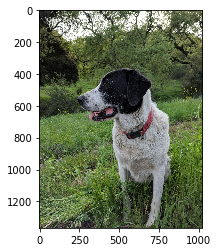

In [4]:
plt.imshow(full)

In [5]:
face = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face ,cv2.COLOR_BGR2RGB)

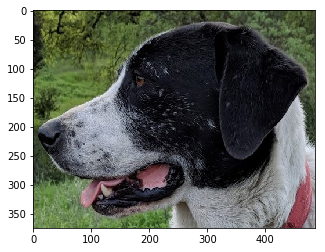

In [6]:
plt.imshow(face)

In [7]:
sum([1,2,3])

6

In [8]:
mystring ='sum'

In [9]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [10]:
myfunc = eval(mystring)

In [11]:
myfunc([1,2,3])

6

In [12]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

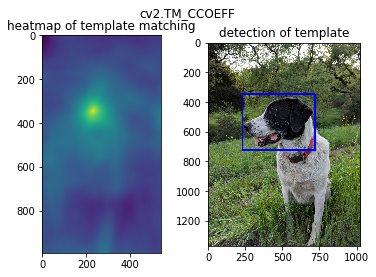

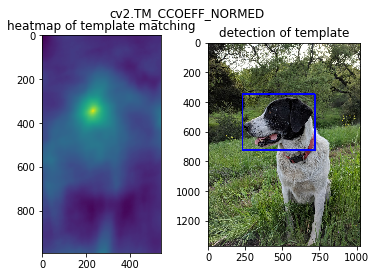

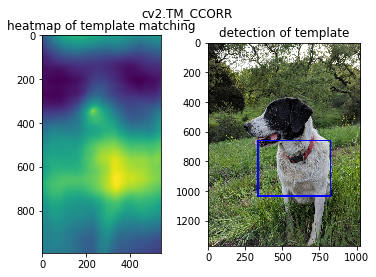

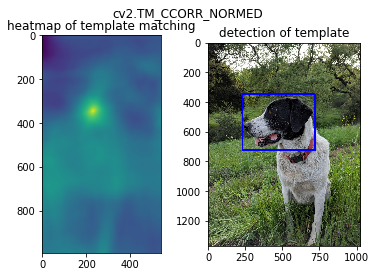

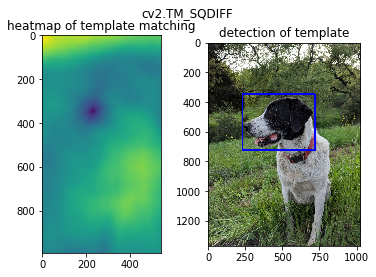

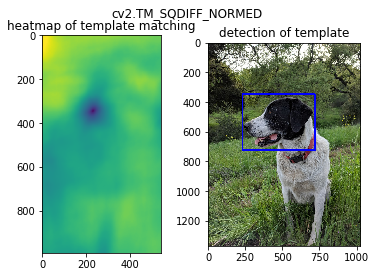

In [19]:
for m in methods:
    
    full_copy = full.copy()
    
    method = eval(m)
    
    result = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_Left = min_loc
    else:
        top_Left = max_loc
    
    height,width,channels = face.shape
    
    bottom_right = (top_Left[0]+width,top_Left[1]+height)
    
    cv2.rectangle(full_copy,top_Left,bottom_right,(0,0,255),10)
    
    plt.subplot(121)
    plt.imshow(result)
    plt.title('heatmap of template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('detection of template')
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')
    print('\n')

In [14]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full,face,my_method)

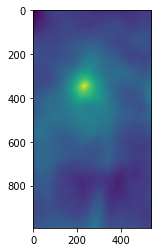

In [17]:
plt.imshow(result)

In [21]:
flat_chess = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

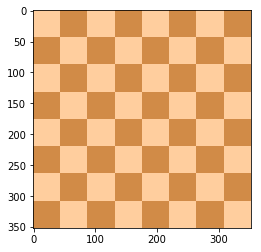

In [22]:
plt.imshow(flat_chess)

In [23]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

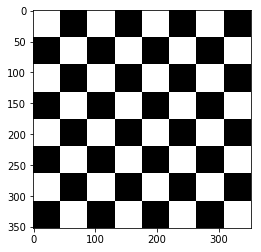

In [24]:
plt.imshow(gray_flat_chess,cmap='gray')

In [25]:
real_chess = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

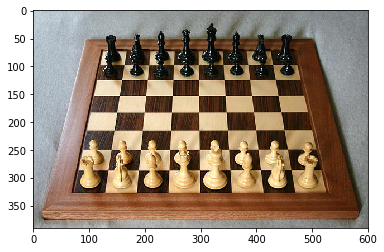

In [27]:
plt.imshow(real_chess)

In [28]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

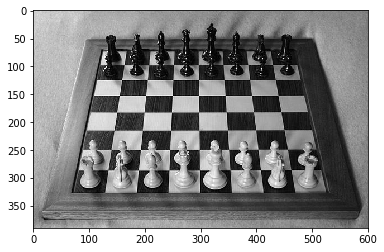

In [30]:
plt.imshow(gray_real_chess,cmap='gray')

In [32]:
gray = np.float32(gray_flat_chess)

In [34]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [35]:
dst = cv2.dilate(dst,None)

In [37]:
flat_chess[dst>0.01*dst.max()] = [255,0,0]

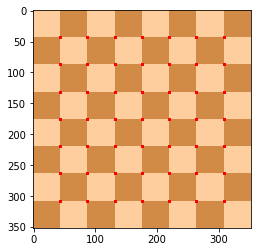

In [39]:
plt.imshow(flat_chess)

In [40]:
gray = np.float32(gray_real_chess)

dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [41]:
dst= cv2.dilate(dst,None)

In [42]:
real_chess[dst>0.01*dst.max()] = [255,0,0]

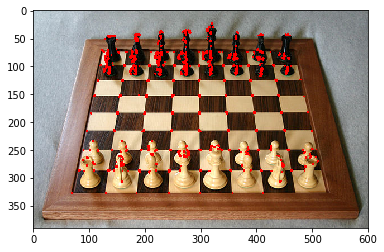

In [44]:
plt.imshow(real_chess)

In [45]:
real_chess = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

In [50]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)

In [51]:
corners =np.int0(corners)

In [52]:
for i in corners:
    x,y=i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

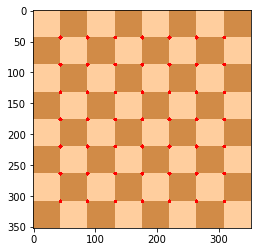

In [53]:
plt.imshow(flat_chess)

In [61]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,100,0.01,10)

In [62]:
corners =np.int0(corners)

In [63]:
for i in corners:
    x,y=i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)

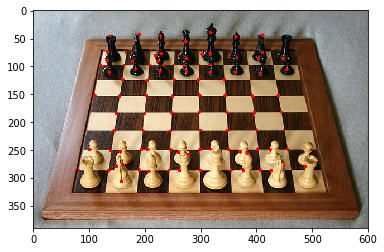

In [64]:
plt.imshow(real_chess)